In [3]:
import pandas as pd
from sklearn import preprocessing
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

df = pd.read_csv('CustomerData.csv')
df = df.bfill()
encoder = preprocessing.LabelEncoder()
df[['category', 'purchase type ', 'gender']] = df[['category', 'purchase type ', 'gender']].apply(encoder.fit_transform)
df.head()

features = df[['age', 'gender', 'annual income (lakhs)']]
target = df['purchase type ']
x_train, x_test, y_train, y_test = train_test_split(features, target, random_state = 0, test_size = 0.3)


In [4]:
from sklearn.ensemble import BaggingClassifier

bag = BaggingClassifier(random_state = 0
                       )
bag.fit(x_train, y_train)
predicted = bag.predict(x_test)
probability = bag.predict_proba(x_test)[:, 1]
bag.score(x_test, y_test)


0.5

              precision    recall  f1-score   support

           0       0.50      0.56      0.53         9
           1       0.50      0.44      0.47         9

    accuracy                           0.50        18
   macro avg       0.50      0.50      0.50        18
weighted avg       0.50      0.50      0.50        18


Confusion matrix :
 [[5 4]
 [5 4]]

Area under the curve:  0.5


Text(0, 0.5, 'tpr')

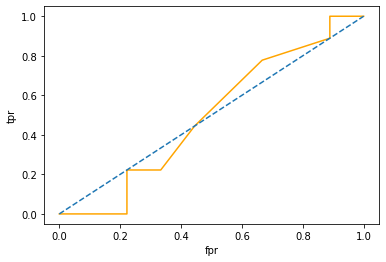

In [6]:
from sklearn import metrics

print(metrics.classification_report(y_test, predicted))
print("\nConfusion matrix :\n", metrics.confusion_matrix(y_test, predicted))
print("\nArea under the curve: ", metrics.roc_auc_score(y_test, predicted))
fpr, tpr, thresholds = metrics.roc_curve(y_test, probability)
plt.plot(fpr, tpr, color = 'orange')
plt.plot([0,1], [0,1], linestyle = '--')
plt.xlabel('fpr')
plt.ylabel('tpr')